In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("C:/Users/Pranay/Downloads/activity.csv")

In [3]:
data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [4]:
data.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Acc (vertical)  494 non-null    float64
 1   LyingDown       494 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


In [327]:
data.shape[0]

494

In [513]:
alpha=0.01

In [514]:
X=data['Acc (vertical)']
Y=data['LyingDown']

In [515]:
X_train=X[0:345]
Y_train=Y[0:345]
X_test=X[345:]
Y_test=Y[345:]
X_train=np.array(X_train).reshape(1,345)
Y_train=np.array(Y_train).reshape(1,345)
X_test=np.array(X_test).reshape(1,149)
Y_test=np.array(Y_test).reshape(1,149)

In [516]:
m=X_train.shape[0]
nx=1

In [517]:
W=np.random.rand(nx,1)
b=np.random.rand(1,1)
Z=np.zeros([1,m],float)
dZ=np.zeros([1,m],float)
A=np.zeros([1,m],float)

In [518]:
ACC_data=[]
iterate=[]
W_graph=[]

In [519]:
%%time
for i in range(0,1000):
    Z=np.dot(W,X_train)+b
    A=1/(1+np.exp(-Z))
    dZ=A-Y_train
    dW=1/m*(np.dot(X_train,dZ.T))
    db=1/m*(np.sum(dZ))
    W=W-(alpha*dW)
    b=b-(alpha*db)
    W_graph.append(W)
    if(dW==0):
        break
    Z_test=(X_test*W)+b
    Z_pred=1/(1+np.exp(-Z_test))
    Y_pred=np.zeros(Z_pred.shape)
    #for l in range(0,Z_pred.shape[1]):
       # if Z_pred[0][l]>0.5:
      #      Y_pred[0][l]=1
      #  else:
       #     Y_pred[0][l]=0
    Inaccuracy=np.abs(np.sum(Y_test - Z_pred))
    Accuracy=(149-Inaccuracy)/149*100
    iterate.append(i)
    ACC_data.append(Accuracy)
i

<timed exec>:13: RuntimeWarning: overflow encountered in exp
<timed exec>:3: RuntimeWarning: overflow encountered in exp


CPU times: total: 203 ms
Wall time: 205 ms


999

In [520]:
df1=pd.DataFrame(iterate,columns=['Num'])
df2=pd.DataFrame(ACC_data,columns=['Accuracy'])
Final=pd.concat([df1,df2],axis=1)

In [521]:
Accuracy

87.89048409705323

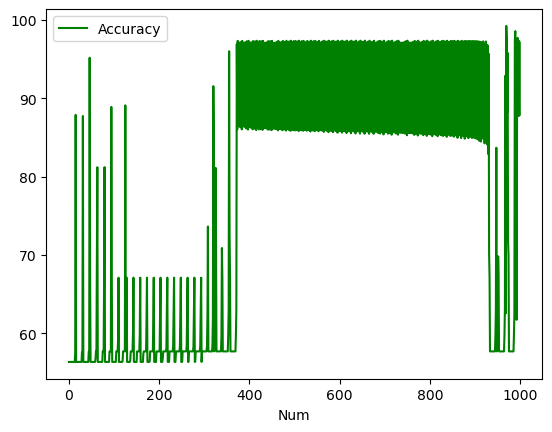

In [522]:
import matplotlib.pyplot as plt
ax = plt.gca()
Final.plot(kind='line',
        x='Num',
        y='Accuracy',
        color='green', ax=ax)
plt.show()

In [524]:
W_graph=np.array(W_graph).reshape(1000,1)
W_graph=pd.DataFrame(W_graph,columns=['W_value'])

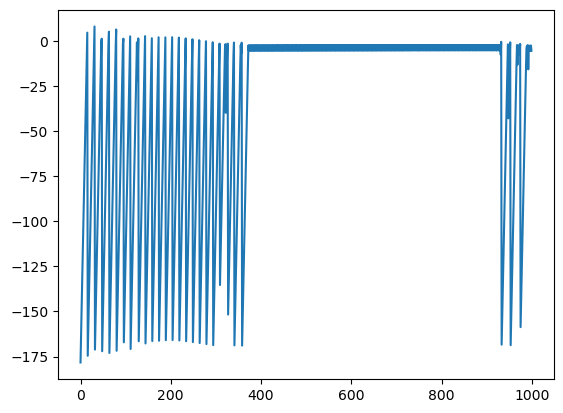

In [525]:
plt.plot(W_graph)